In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
from tensorflow import keras

import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.shape

(7043, 21)

In [5]:
df.drop("customerID",axis=1,inplace=True)#droping it as it is useless in ML models

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [8]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
#total charges is object where , monthly charges is flot so we have to convert that

In [10]:
df.TotalCharges.values#values are string

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
pd.to_numeric(df.TotalCharges,errors="coerce")

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
5        820.50
6       1949.40
7        301.90
8       3046.05
9       3487.95
10       587.45
11       326.80
12      5681.10
13      5036.30
14      2686.05
15      7895.15
16      1022.95
17      7382.25
18       528.35
19      1862.90
20        39.65
21       202.25
22        20.15
23      3505.10
24      2970.30
25      1530.60
26      4749.15
27        30.20
28      6369.45
29      1093.10
30      6766.95
31       181.65
32      1874.45
33        20.20
34        45.25
35      7251.70
36       316.90
37      3548.30
38      3549.25
39      1105.40
40       475.70
41      4872.35
42       418.25
43      4861.45
44       981.45
45      3906.70
46        97.00
47       144.15
48      4217.80
49      4254.10
50      3838.75
51      1426.40
52      1752.65
53       633.30
54      4456.35
55      1752.55
56      6311.20
57      7076.35
58       894.30
59      7853.70
60      4707.10
61      5450.70
62      

In [12]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()].shape[0]

11

In [13]:
#11 rows have null so droping them

In [14]:
df1=df[df.TotalCharges!=" "]

In [15]:
df1.shape

(7032, 20)

In [16]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
df1.TotalCharges.dtypes


dtype('float64')

In [18]:
ten_churn_no=df1[df1.Churn =="No"].tenure
ten_churn_yes=df1[df1.Churn =="Yes"].tenure

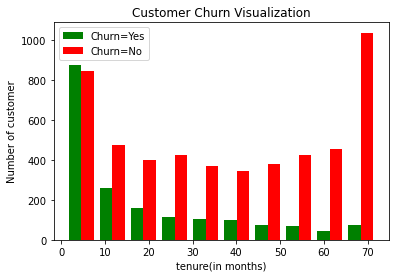

In [19]:
plt.xlabel("tenure(in months)")
plt.ylabel("Number of customer")
plt.title("Customer Churn Visualization")


plt.hist([ten_churn_yes,ten_churn_no],color=["green","red"],label=["Churn=Yes","Churn=No"])
plt.legend()

In [20]:
def print_col_object(df):
    for col in df:
        if df[col].dtypes=="object":
            print(f'{col}:{df[col].unique()}')

In [21]:
print_col_object(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [22]:
df1.replace("No internet service","No",inplace=True)
df1.replace("No phone service","No",inplace=True)


C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
print_col_object(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [24]:
yes_no_column=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
              'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [25]:
for col in yes_no_column:
    df1[col].replace({"Yes":1,"No":0},inplace=True)
    print(f'{col}:{df1[col].unique()}')

Partner:[1 0]
Dependents:[0 1]


C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
Churn:[0 1]


In [26]:
df1['gender'].replace({'Female':1,"Male":0},inplace=True)


In [27]:
df1['gender'].unique()



array([1, 0], dtype=int64)

In [28]:
c=['InternetService','Contract','PaymentMethod']

In [34]:
df2=pd.get_dummies(data=df1,columns=c)

In [30]:
#df1.drop(c,axis=1,inplace=True)

In [36]:
df2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1


In [37]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [45]:
#scaling data in range of 0 to 1

In [39]:
col_to_scal=["tenure",'MonthlyCharges','TotalCharges']

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler=MinMaxScaler()

In [43]:
df2[col_to_scal]=scaler.fit_transform(df2[col_to_scal])

In [44]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1985,1,0,1,1,0.154930,0,0,0,1,0,0,0,0,0,0.108955,0.033499,1,1,0,0,1,0,0,0,0,0,1
1305,1,0,0,0,0.380282,1,0,0,0,1,0,1,0,1,0.410945,0.187820,0,1,0,0,1,0,0,1,0,0,0
5386,0,0,0,0,0.126761,1,0,0,0,0,0,0,0,1,0.274129,0.048165,0,1,0,0,1,0,0,0,1,0,0
4944,0,0,1,1,0.126761,1,1,0,0,0,0,0,0,1,0.061194,0.027129,0,0,0,1,1,0,0,0,0,0,1
3371,1,0,1,1,0.140845,1,0,0,0,0,0,0,0,1,0.009950,0.018636,1,0,0,1,1,0,0,0,0,0,1


In [46]:
x=df2.drop("Churn",axis=1)
y=df2["Churn"]

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

In [49]:
#deploying model

In [50]:
x_train.shape

(5625, 26)

In [53]:
model=keras.Sequential([
    keras.layers.Dense(22,input_shape=(26,),activation="relu"),
    keras.layers.Dense(14,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5028 - accuracy: 0.7570
Epoch 2/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4263 - accuracy: 0.7995
Epoch 3/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4182 - accuracy: 0.8039
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8080
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4128 - accuracy: 0.8084
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4104 - accuracy: 0.8091
Epoch 7/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4083 - accuracy: 0.8092
Epoch 8/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4067 - accuracy: 0.8046
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4058 - accuracy: 0.8087
Epoch 10/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4044 - accura

176/176 [==============================] - 1s 6ms/step - loss: 0.3635 - accuracy: 0.8297
Epoch 82/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3635 - accuracy: 0.8288
Epoch 83/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3633 - accuracy: 0.8297
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3634 - accuracy: 0.8288
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3623 - accuracy: 0.8297
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3614 - accuracy: 0.8315
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3635 - accuracy: 0.8277
Epoch 88/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3626 - accuracy: 0.8272
Epoch 89/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3622 - accuracy: 0.8297
Epoch 90/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3613 - accuracy: 

In [54]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 1s 4ms/step - loss: 0.4760 - accuracy: 0.7726


[0.4759853482246399, 0.7725657224655151]

In [55]:
yp=model.predict(x_test)

In [56]:
yp[:5]

array([[0.03929782],
       [0.14237177],
       [0.21511444],
       [0.27399623],
       [0.4602751 ]], dtype=float32)

In [57]:
y_pred=[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [60]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [59]:
y_test[:10]

2287    1
2087    1
2308    0
1960    0
4634    0
621     0
2983    0
6675    0
160     0
6409    0
Name: Churn, dtype: int64

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1021
           1       0.62      0.45      0.52       386

    accuracy                           0.77      1407
   macro avg       0.71      0.67      0.69      1407
weighted avg       0.76      0.77      0.76      1407



In [63]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

Text(33.0, 0.5, 'True')

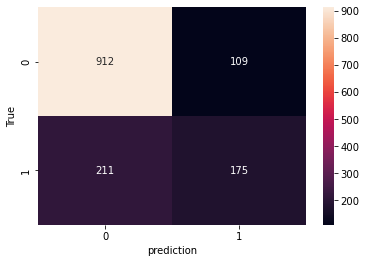

In [64]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("prediction")
plt.ylabel("True")
